#Training Services dataset using Federated Learning using 5 client models

###### In this implementation we have used regression training using neural networks. Other methods like classification with semi-supervised pseudo-labelling (as shown with MNIST Dataset) can also be used.

In [30]:
import pandas as pd
import numpy as np
import keras
import copy
from keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Loading and processing Dataset

In [31]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset.csv")
numRows = dataset.shape[0]
dataset.head()

,Service Id,Multi-Tenancy model,Automated Provisioning,Single Sign On,Subscription Based Billing,High Availability,Elastic Infrastructure,Data Security,Application Security,Rate Limiting/QoS,Audit,Security,Scalability,Ease Of Use,Latency,Score
0,Service_ID : 1,789,Low,No,Medium,Medium,Neutral,Low,Medium,74,Medium,Low,High,Neutral,Medium,59.3750
1,Service_ID : 2,247,High,No,Low,High,Agree,High,High,50,Low,High,Low,Neutral,Medium,65.6250
2,Service_ID : 3,568,High,Yes,Medium,Medium,Agree,Medium,Medium,41,Medium,Medium,Medium,Strongly Agree,Low,81.2500
3,Service_ID : 4,527,Medium,Yes,Medium,Low,Agree,Medium,High,57,High,High,Medium,Agree,Low,82.8125
4,Service_ID : 5,556,Medium,No,Low,Low,Neutral,Low,Medium,89,High,Low,High,Strongly Disagree,Medium,46.8750


In [32]:
feature_variables = dataset.iloc[:, 1:11]
target_variables = dataset.iloc[:, 11:15]
finalScore = dataset.iloc[:,15:16]

In [33]:
feature_variables.head()

,Multi-Tenancy model,Automated Provisioning,Single Sign On,Subscription Based Billing,High Availability,Elastic Infrastructure,Data Security,Application Security,Rate Limiting/QoS,Audit
0,789,Low,No,Medium,Medium,Neutral,Low,Medium,74,Medium
1,247,High,No,Low,High,Agree,High,High,50,Low
2,568,High,Yes,Medium,Medium,Agree,Medium,Medium,41,Medium
3,527,Medium,Yes,Medium,Low,Agree,Medium,High,57,High
4,556,Medium,No,Low,Low,Neutral,Low,Medium,89,High


In [34]:
target_variables.head()

,Security,Scalability,Ease Of Use,Latency
0,Low,High,Neutral,Medium
1,High,Low,Neutral,Medium
2,Medium,Medium,Strongly Agree,Low
3,High,Medium,Agree,Low
4,Low,High,Strongly Disagree,Medium


In [35]:
finalScore.head()

,Score
0,59.3750
1,65.6250
2,81.2500
3,82.8125
4,46.8750


In [36]:
mp = {"Low":1, "Medium":2, "High":3}

for i in range(numRows):
    feature_variables["Automated Provisioning"][i] = mp[feature_variables["Automated Provisioning"][i]]

feature_variables["Automated Provisioning"] = pd.to_numeric(feature_variables["Automated Provisioning"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
mp = {"Yes":1, "No":0}

for i in range(numRows):
    feature_variables["Single Sign On"][i] = mp[feature_variables["Single Sign On"][i]]

feature_variables["Single Sign On"] = pd.to_numeric(feature_variables["Single Sign On"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
mp = {"Low":1, "Medium":2, "High":3}

for i in range(numRows):
    feature_variables["Subscription Based Billing"][i] = mp[feature_variables["Subscription Based Billing"][i]]

feature_variables["Subscription Based Billing"] = pd.to_numeric(feature_variables["Subscription Based Billing"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
mp = {"Low":1, "Medium":2, "High":3}

for i in range(numRows):
    feature_variables["High Availability"][i] = mp[feature_variables["High Availability"][i]]

feature_variables["High Availability"] = pd.to_numeric(feature_variables["High Availability"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
mp = {"Strongly Disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Strongly Agree":5}

for i in range(numRows):
    feature_variables["Elastic Infrastructure"][i] = mp[feature_variables["Elastic Infrastructure"][i]]

feature_variables["Elastic Infrastructure"] = pd.to_numeric(feature_variables["Elastic Infrastructure"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
mp = {"Low":1, "Medium":2, "High":3}

for i in range(numRows):
    feature_variables["Data Security"][i] = mp[feature_variables["Data Security"][i]]

feature_variables["Data Security"] = pd.to_numeric(feature_variables["Data Security"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
mp = {"Low":1, "Medium":2, "High":3}

for i in range(numRows):
    feature_variables["Application Security"][i] = mp[feature_variables["Application Security"][i]]

feature_variables["Application Security"] = pd.to_numeric(feature_variables["Application Security"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
mp = {"Low":1, "Medium":2, "High":3}

for i in range(numRows):
    feature_variables["Audit"][i] = mp[feature_variables["Audit"][i]]

feature_variables["Audit"] = pd.to_numeric(feature_variables["Audit"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
mp = {"Low":1, "Medium":2, "High":3}

for i in range(numRows):
    target_variables["Security"][i] = mp[target_variables["Security"][i]]

target_variables["Security"] = pd.to_numeric(target_variables["Security"])

In [45]:
mp = {"Low":1, "Medium":2, "High":3}

for i in range(numRows):
    target_variables["Scalability"][i] = mp[target_variables["Scalability"][i]]

target_variables["Scalability"] = pd.to_numeric(target_variables["Scalability"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [46]:
mp = {"Strongly Disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Strongly Agree":5}

for i in range(numRows):
    target_variables["Ease Of Use"][i] = mp[target_variables["Ease Of Use"][i]]

target_variables["Ease Of Use"] = pd.to_numeric(target_variables["Ease Of Use"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
mp = {"Very High":1, "High":2, "Medium":3, "Low":4, "Very Low":5}

for i in range(numRows):
    target_variables["Latency"][i] = mp[target_variables["Latency"][i]]

target_variables["Latency"] = pd.to_numeric(target_variables["Latency"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
feature_variables.head()

,Multi-Tenancy model,Automated Provisioning,Single Sign On,Subscription Based Billing,High Availability,Elastic Infrastructure,Data Security,Application Security,Rate Limiting/QoS,Audit
0,789,1,0,2,2,3,1,2,74,2
1,247,3,0,1,3,4,3,3,50,1
2,568,3,1,2,2,4,2,2,41,2
3,527,2,1,2,1,4,2,3,57,3
4,556,2,0,1,1,3,1,2,89,3


In [49]:
target_variables.head()

,Security,Scalability,Ease Of Use,Latency
0,1,3,3,3
1,3,1,3,3
2,2,2,5,4
3,3,2,4,4
4,1,3,1,3


In [50]:
print(feature_variables.dtypes)

Multi-Tenancy model           int64
Automated Provisioning        int64
Single Sign On                int64
Subscription Based Billing    int64
High Availability             int64
Elastic Infrastructure        int64
Data Security                 int64
Application Security          int64
Rate Limiting/QoS             int64
Audit                         int64
dtype: object


#Heat Map for collinearity insights in the created dataset

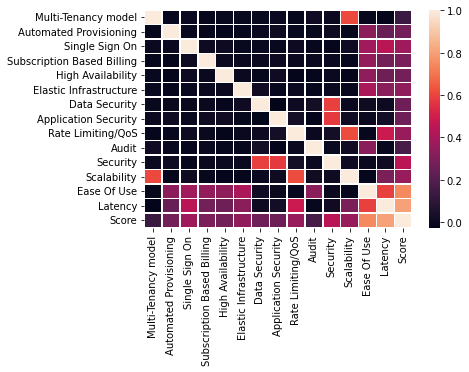

In [51]:
import seaborn as sns

ax = sns.heatmap(pd.concat([feature_variables, target_variables, finalScore], axis=1).corr(), linewidth=0.5)
plt.show()

In [52]:
scaler_x = MinMaxScaler()
feature_variables = scaler_x.fit_transform(feature_variables)
feature_variables

array([[0.78878879, 0.        , 0.        , ..., 0.5       , 0.73737374,
        0.5       ],
       [0.24624625, 1.        , 0.        , ..., 1.        , 0.49494949,
        0.        ],
       [0.56756757, 1.        , 1.        , ..., 0.5       , 0.4040404 ,
        0.5       ],
       ...,
       [0.66866867, 1.        , 0.        , ..., 0.5       , 0.1010101 ,
        1.        ],
       [0.59359359, 0.        , 0.        , ..., 0.        , 0.14141414,
        0.5       ],
       [0.58258258, 0.        , 1.        , ..., 0.        , 0.41414141,
        1.        ]])

In [53]:
scaler_secure = MinMaxScaler()
scaler_scale = MinMaxScaler()
scaler_ease = MinMaxScaler()
scaler_latency = MinMaxScaler()

target_secure = scaler_secure.fit_transform(target_variables.iloc[:,0:1])
target_scale = scaler_scale.fit_transform(target_variables.iloc[:,1:2])
target_ease = scaler_ease.fit_transform(target_variables.iloc[:,2:3])
target_latency = scaler_latency.fit_transform(target_variables.iloc[:,3:4])

targets = np.concatenate([target_secure, target_scale, target_ease, target_latency], axis=1)

#Defining the neural network

In [54]:
def getModel(inputShape=10, outputShape=1):

    inputs = keras.Input(shape=(inputShape), name="digits")
    x = layers.Dense(8, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(8, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(outputShape, activation="relu", name="predictions")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

#Defining methods of federated learning for segregating data, creating client models, creating global models and FedAvg aggregation of weights


### Four Global Models

- Security
- Scalability
- Ease Of Use
- Latency

### 5 client models for each of the global model ( 5 x 4 = 20 )

- Security x 5
- Scalability x 5
- Ease Of Use x 5
- Latency x 5


In [55]:
def prepareClientDatasets(num_clients, xTrain, yTrain, modelTypes):

    samples_per_client = (int)(xTrain.shape[0]/num_clients)

    client_datasets = {}

    for i in range(num_clients):
        
        x_values = xTrain[i*samples_per_client:(i+1)*samples_per_client]
        y_values = yTrain[i*samples_per_client:(i+1)*samples_per_client]

        modelTypeMap = {}

        for j in range(len(modelTypes)):
            modelTypeMap[modelTypes[j]] = [x_values, y_values[:,j]]

        client_datasets["client_" + str(i+1)] = modelTypeMap
    
    return client_datasets

def getClientModels(num_clients, modelTypes, inputShape, outputShape):
    
    client_models = {}

    for i in range(num_clients):

        modelMap = {}

        for j in range(len(modelTypes)):
            
            modelMap[modelTypes[j]] = getModel(inputShape, outputShape)

        client_models["client_" + str(i+1)] = modelMap

    return client_models

def getGlobalModels(modelTypes):

    global_models = {}

    for i in range(len(modelTypes)):
        
        global_models[modelTypes[i]] = getModel(inputShape, outputShape)
    
    return global_models

def updateGlobalModels(num_clients, client_models_all, global_models_all, modelTypes):

    global_models = {}

    for z in range(len(modelTypes)):
        global_model = global_models_all[modelTypes[z]]

        client_models = []

        for i in range(num_clients):
            client_models.append(client_models_all["client_" + str(i+1)][modelTypes[z]])
        

        client_wts_sum = client_models[0].get_weights()

        for i in range(len(client_wts_sum)):

            for j in range(len(client_wts_sum[i])):

                client_wts_sum[i][j] = client_wts_sum[i][j]/num_clients 


        for k in range(1, num_clients):

            temp_wts = client_models[k].get_weights()

            for i in range(len(client_wts_sum)):

                for j in range(len(client_wts_sum[i])):

                    client_wts_sum[i][j] = client_wts_sum[i][j] + temp_wts[i][j]/num_clients

        global_model.set_weights(client_wts_sum)

        global_models[modelTypes[z]] = global_model

    return global_models


In [56]:
numGlobalRounds = 20
numLocalRounds = 2
num_clients = 5
inputShape = 10
outputShape = 1

modelTypes = ["Security", "Scalability", "Ease Of Use", "Latency"]

x_train, x_test, y_train, y_test = train_test_split(feature_variables, targets, test_size=0.2, random_state=42)

client_datasets = prepareClientDatasets(num_clients, x_train, y_train, modelTypes)
client_models = getClientModels(num_clients, modelTypes, inputShape, outputShape)
global_models = getGlobalModels(modelTypes)

print("==================================================>> Starting Federated Learning <<=============================================\n")

for i in range(numGlobalRounds):

    print("===============================>>>>> Starting iteration number : " + str(i+1) + " <<<<<===============================\n\n")

    for j in range(num_clients):

        print("================================>>>>>> Training Client Model : ", str(j+1) + " <<<<<================================\n")

        for k in range(len(modelTypes)):
            print("Training model for " + modelTypes[k] + " Prediction")

            client_models["client_" + str(j+1)][modelTypes[k]].fit(
            client_datasets["client_" + str(j+1)][modelTypes[k]][0],
            client_datasets["client_" + str(j+1)][modelTypes[k]][1],
            batch_size=32,
            epochs=numLocalRounds,
            validation_data=((x_test, y_test[:,k])))
        
    global_models = updateGlobalModels(num_clients, client_models, global_models, modelTypes)

    print("===========>>>>>   Testing Global Model   <<<<<==========\n\n")

    for k in range(len(modelTypes)):

        print("R squared " + modelTypes[k] + " : ", r2_score(y_test[:,k], global_models[modelTypes[k]].predict(x_test)))
    
    client_models = getClientModels(num_clients, modelTypes, inputShape, outputShape)

    for c in range(num_clients):

        for k in range(len(modelTypes)):
            client_models["client_" + str(c+1)][modelTypes[k]].set_weights(global_models[modelTypes[k]].get_weights())

    




==================================================>> Starting Federated Learning <<=============================================

===============================>>>>> Starting iteration number : 1 <<<<<===============================


================================>>>>>> Training Client Model :  1 <<<<<================================

Training model for Security Prediction
Epoch 1/2
50/50 [==============================] - 0s 4ms/step - loss: 0.2068 - val_loss: 0.1655
Epoch 2/2
50/50 [==============================] - 0s 3ms/step - loss: 0.1603 - val_loss: 0.1415
Training model for Scalability Prediction
Epoch 1/2
50/50 [==============================] - 1s 4ms/step - loss: 0.2248 - val_loss: 0.1964
Epoch 2/2
50/50 [==============================] - 0s 3ms/step - loss: 0.1965 - val_loss: 0.1814
Training model for Ease Of Use Prediction
Epoch 1/2
50/50 [==============================] - 0s 4ms/step - loss: 0.0834 - val_loss: 0.0668
Epoch 2/2
50/50 [==============================] - 

## Saving the global models and converting to Tensorflow.js (tfjs) format

In [57]:
#Saving Global Models

for i in range(len(modelTypes)):
    print(modelTypes[i] + "Saved Model")
    global_models[modelTypes[i]].save("/content/drive/MyDrive/Federated_models/" + modelTypes[i] + ".h5")

SecuritySaved Model
ScalabilitySaved Model
Ease Of UseSaved Model
LatencySaved Model


In [58]:
# (Never mind the incompatible package complaints - it just works fine.)
!pip install -q tensorflowjs

import tensorflowjs as tfjs
import tensorflow as tf
# Convert model
tf.keras.backend.clear_session()  # Clean up variable names before exporting.
# (You can safely ignore the H5pyDeprecationWarning here...)
model = tf.keras.models.load_model("/content/drive/MyDrive/Federated_models/Security.h5")
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/Federated_models/security")

tf.keras.backend.clear_session()  # Clean up variable names before exporting.

model = tf.keras.models.load_model("/content/drive/MyDrive/Federated_models/Scalability.h5")
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/Federated_models/scalability")

tf.keras.backend.clear_session()  # Clean up variable names before exporting.

model = tf.keras.models.load_model("/content/drive/MyDrive/Federated_models/Ease Of Use.h5")
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/Federated_models/ease_of_use")

tf.keras.backend.clear_session()  # Clean up variable names before exporting.

model = tf.keras.models.load_model("/content/drive/MyDrive/Federated_models/Latency.h5")
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/Federated_models/latency")